In [15]:
'''
Implement the following Neural Network architecture for the classification task in Assignment 3 (the bill_authentication.csv)

Input Layer: 12 nodes - relu activation
Hidden Layer 1: 10 nodes - relu activation
Hidden Layer 2: 8 nodes - relu activation
Hidden Layer 3: 5 nodes - relu activation
Output Layer: 1 node - sigmoid activation

test size = 30%
'''

'\nImplement the following Neural Network architecture for the classification task in Assignment 3 (the bill_authentication.csv)\n\nInput Layer: 12 nodes - relu activation\nHidden Layer 1: 10 nodes - relu activation\nHidden Layer 2: 8 nodes - relu activation\nHidden Layer 3: 5 nodes - relu activation\nOutput Layer: 1 node - sigmoid activation\n\ntest size = 30%\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('bill_authentication.csv')
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data.max(axis=0) # will return max value of each column

Variance     6.8248
Skewness    12.9516
Curtosis    17.9274
Entropy      2.4495
Class        1.0000
dtype: float64

In [5]:
data.min(axis=0) # will return min value of each column

Variance    -7.0421
Skewness   -13.7731
Curtosis    -5.2861
Entropy     -8.5482
Class        0.0000
dtype: float64

In [62]:
y = data.drop(columns=['Variance','Skewness','Curtosis','Entropy'], axis=1)
# y = data.Class
x = data.drop(columns='Class', axis=1)
# x = data.drop(columns=['Class'])

In [45]:
x.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [63]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [47]:
scaler = MinMaxScaler()
scaler.fit(x)
x_transformed = scaler.transform(x)

In [48]:
x_transformed

array([[0.76900389, 0.83964273, 0.10678269, 0.73662766],
       [0.83565902, 0.82098209, 0.12180412, 0.64432563],
       [0.78662859, 0.41664827, 0.31060805, 0.78695091],
       ...,
       [0.23738543, 0.01176814, 0.98560321, 0.52475518],
       [0.25084193, 0.20170105, 0.76158701, 0.6606745 ],
       [0.32452819, 0.49074676, 0.34334762, 0.88594888]])

In [49]:
scaler.fit(data)
data_transformed = scaler.transform(data)

In [50]:
data_transformed

array([[0.76900389, 0.83964273, 0.10678269, 0.73662766, 0.        ],
       [0.83565902, 0.82098209, 0.12180412, 0.64432563, 0.        ],
       [0.78662859, 0.41664827, 0.31060805, 0.78695091, 0.        ],
       ...,
       [0.23738543, 0.01176814, 0.98560321, 0.52475518, 1.        ],
       [0.25084193, 0.20170105, 0.76158701, 0.6606745 , 1.        ],
       [0.32452819, 0.49074676, 0.34334762, 0.88594888, 1.        ]])

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.3)

In [52]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 12)                60        
                                                                 
 dense_11 (Dense)            (None, 10)                130       
                                                                 
 dense_12 (Dense)            (None, 8)                 88        
                                                                 
 dense_13 (Dense)            (None, 5)                 45        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [74]:
history = model.fit(x_train, y_train, epochs=15, batch_size=10)

Epoch 1/15
96/96 [==============================] - 1s 5ms/step - loss: 0.0859 - accuracy: 0.9792
Epoch 2/15
96/96 [==============================] - 1s 5ms/step - loss: 0.0703 - accuracy: 0.9823
Epoch 3/15
96/96 [==============================] - 1s 5ms/step - loss: 0.0618 - accuracy: 0.9844
Epoch 4/15
96/96 [==============================] - 1s 12ms/step - loss: 0.0494 - accuracy: 0.9896
Epoch 5/15
96/96 [==============================] - 1s 6ms/step - loss: 0.0460 - accuracy: 0.9885
Epoch 6/15
96/96 [==============================] - 1s 6ms/step - loss: 0.0381 - accuracy: 0.9906
Epoch 7/15
96/96 [==============================] - 1s 6ms/step - loss: 0.0340 - accuracy: 0.9927
Epoch 8/15
96/96 [==============================] - 1s 6ms/step - loss: 0.0291 - accuracy: 0.9948
Epoch 9/15
96/96 [==============================] - 1s 6ms/step - loss: 0.0250 - accuracy: 0.9937
Epoch 10/15
96/96 [==============================] - 1s 6ms/step - loss: 0.0253 - accuracy: 0.9937
Epoch 11/15
96/96 

In [75]:
model.evaluate(x_test, y_test)[1]

13/13 [==============================] - 0s 6ms/step - loss: 0.0135 - accuracy: 0.9976


0.9975728392601013

Text(0, 0.5, 'loss')

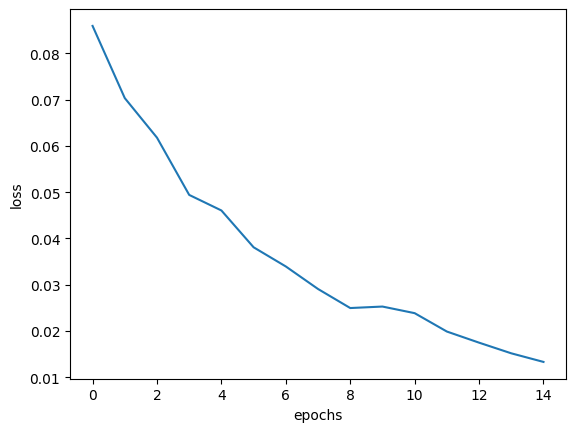

In [76]:
plt.plot(history.epoch, history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

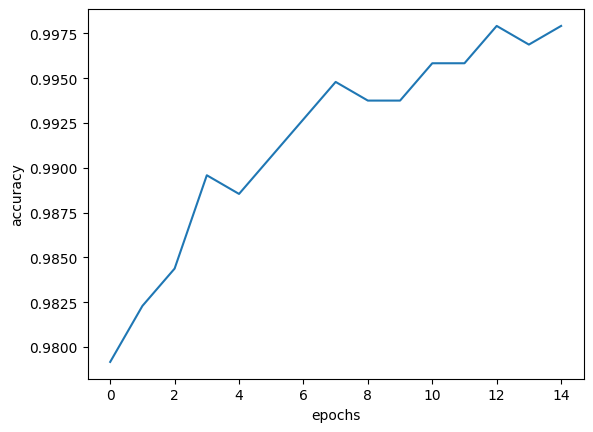

In [77]:
plt.plot(history.epoch, history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [78]:
nn_prediction = np.argmax(model.predict(x_test), axis=1)

print('Neural Network Accuracy')
model.evaluate(x_test, y_test)[1]

13/13 [==============================] - 0s 7ms/step
Neural Network Accuracy
13/13 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9976


0.9975728392601013

In [79]:
nn_prediction = model.predict(x_test)
nn_prediction

13/13 [==============================] - 0s 3ms/step


array([[8.55064209e-05],
       [3.92223337e-05],
       [1.77688198e-04],
       [5.95816346e-05],
       [1.31481633e-04],
       [9.99857664e-01],
       [5.36138941e-05],
       [4.41975790e-05],
       [4.52893364e-05],
       [1.54384135e-04],
       [9.99893486e-01],
       [1.52192864e-04],
       [3.81644204e-05],
       [9.11156833e-01],
       [9.98800874e-01],
       [9.98777986e-01],
       [1.80134462e-04],
       [3.49292066e-04],
       [9.99834120e-01],
       [4.41835036e-05],
       [1.49522850e-04],
       [1.93515923e-04],
       [8.33764570e-05],
       [9.93944824e-01],
       [1.77734459e-04],
       [3.06764159e-05],
       [9.99515474e-01],
       [9.99940395e-01],
       [8.18815242e-05],
       [9.98388052e-01],
       [9.99791026e-01],
       [9.63184793e-05],
       [3.66075146e-05],
       [3.37606674e-04],
       [9.84020591e-01],
       [4.69405677e-05],
       [1.48085514e-04],
       [9.84721780e-01],
       [9.85853910e-01],
       [1.18959026e-04],


In [80]:
print(type(nn_prediction))
nn_prediction_rounded = np.round(nn_prediction)
nn_prediction_rounded = nn_prediction_rounded.astype(int)
nn_prediction_rounded

<class 'numpy.ndarray'>


array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
    

Text(0.5, 427.9555555555555, 'Predicted label')

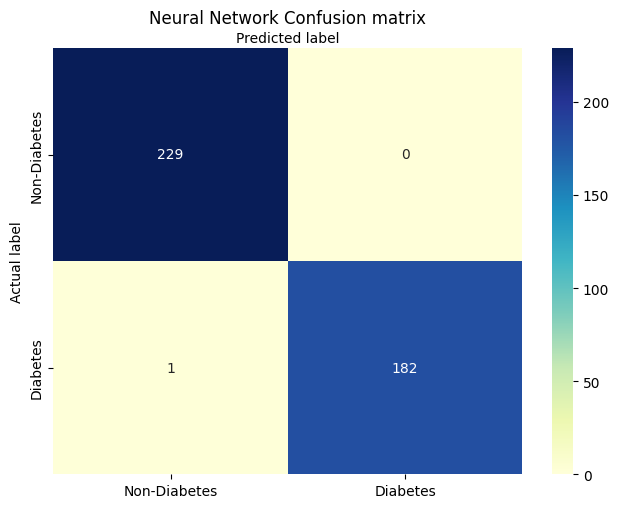

In [81]:
import seaborn as sns
from sklearn import metrics

class_names=['Non-Diabetes','Diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

# create heatmap
nn_cnf_matrix = metrics.confusion_matrix(y_test, nn_prediction_rounded)
sns.heatmap(nn_cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Neural Network Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')